# Importacion de librerias

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys

## Configuracion del path del sistema para la carpeta de donde se importan funciones

In [60]:
sys.path.append(os.path.abspath(r'C:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP-GITHUB\DS102024'))

## Leer archivo csv limpio tras el primer análisis y crear la copia para trabajar con los datos

In [61]:
data_set = pd.read_csv('vgsales_limpio.csv', index_col=0)

In [62]:
df = data_set.copy()

In [63]:
df.query('NA_Sales > 40')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


# Análisis exploratório de datos (EDA)

## Análisis univariado

### Estadisticas descriptivas

In [64]:
resumen = []

for columna in df.columns:
    data = df[columna]
    tipo_dato = df[columna].dtype

    if tipo_dato in ['float64','int64']:
        var_tipo = 'numerica'
        card_absoluta = data.nunique()
        card_relativa = (data.nunique() / len(df)) * 100
        missing_pct = round(df[columna].isnull().mean()*100,2)
        rango = (data.min(), data.max())
        moda = data.mode()[0] if not data.mode().empty else np.nan
        mean_val = data.mean()
        median_val = data.median()
        skew_val = data.skew()
        kurtosis_val = data.kurtosis()
        std_deviation_val = data.std()
        # Shapiro test
        stat_, p_ = stats.shapiro(data) if len(data) > 3 else (np.nan, np.nan) 
        normal_test = 'No normal' if p_ < 0.05 else 'Normal'
        dist = 'No Gaussiana' if p_ < 0.05 else 'Gaussiana'
        # calculo de outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 -Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = (data < limite_inferior) | (data > limite_superior)
        outliers_pct = round((outliers.sum() / len(data)) * 100,2)
        resumen.append([columna, tipo_dato, var_tipo, card_absoluta, card_relativa, dist, missing_pct, outliers_pct, rango, moda, mean_val, median_val, std_deviation_val, skew_val, kurtosis_val, normal_test])
    else:
        var_tipo = 'categorica'
        card_absoluta = data.nunique()
        card_relativa = (data.nunique() / len(df)) * 100
        # Para categoricas no se aplica normalidad
        missing_pct = round(df[columna].isnull().mean()*100,2)
        resumen.append([columna, tipo_dato, var_tipo, card_absoluta, card_relativa, None, missing_pct, None, None, None, None, None, None, None, None])

resumen_df = pd.DataFrame(resumen, columns=['variable', 'tipo de dato', 'tipo de variable', 'cardinalidad abs' ,'cardinalidad %', 'distribucion', '% missing', '% Outliers', 'rango', 'moda', 'media', 'mediana', 'desv estandar', 'asimetria', 'curtosis', 'prueba normalidad'])
resumen_df

c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.p

,variable,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,media,mediana,desv estandar,asimetria,curtosis,prueba normalidad
0,Name,object,categorica,11490,69.250241,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
1,Platform,object,categorica,31,0.186837,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
2,Year,int64,numerica,39,0.235053,No Gaussiana,0.0,1.94,"(1977, 2016)",2008.00,2006.384824,2007.00,5.861057,-1.060233,2.119000,No normal
3,Genre,object,categorica,12,0.072324,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4,Publisher,object,categorica,583,3.513742,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
5,NA_Sales,float64,numerica,409,2.465043,No Gaussiana,0.0,10.13,"(0.0, 41.49)",0.00,0.264746,0.08,0.816818,18.796829,648.927996,No normal
6,EU_Sales,float64,numerica,305,1.838235,No Gaussiana,0.0,12.54,"(0.0, 29.02)",0.00,0.146705,0.02,0.505435,18.872680,755.791791,No normal
7,JP_Sales,float64,numerica,244,1.470588,No Gaussiana,0.0,14.62,"(0.0, 10.22)",0.00,0.077806,0.00,0.309344,11.204490,194.165937,No normal
8,Other_Sales,float64,numerica,157,0.946239,No Gaussiana,0.0,10.03,"(0.0, 10.57)",0.00,0.048079,0.01,0.188621,24.230051,1025.011194,No normal
9,Global_Sales,float64,numerica,623,3.754822,No Gaussiana,0.0,11.41,"(0.01, 82.74)",0.02,0.537613,0.17,1.555282,17.398104,603.748290,No normal


### Visualización de histogramas, kde y violinplots

In [99]:
# Transformación de variables continuas a categoricas utilizando pd.cut
bin_edges = [0, 0.25, 0.5, 1, 5, 10, 20, 50, 100]
bin_labels = ['0 - 0.25', '0.25 - 0.5', '0.5 - 1', '1 - 5', '5 - 10', '10 - 20', '20 - 50', '50+']

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sales_columns_regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for col in sales_columns:
    df[f'{col}_Range'] = pd.cut(df[col], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [100]:
for col in sales_columns:
    print((df[f'{col}_Range'].value_counts())/len(df)*100)

NA_Sales_Range
0 - 0.25      76.325940
0.25 - 0.5    11.378978
0.5 - 1        6.900916
1 - 5          5.044600
5 - 10         0.271215
10 - 20        0.054243
20 - 50        0.024108
50+            0.000000
Name: count, dtype: float64
EU_Sales_Range
0 - 0.25      86.668274
0.25 - 0.5     6.798457
0.5 - 1        3.700579
1 - 5          2.669961
5 - 10         0.138621
10 - 20        0.018081
20 - 50        0.006027
50+            0.000000
Name: count, dtype: float64
JP_Sales_Range
0 - 0.25      92.635005
0.25 - 0.5     3.959740
0.5 - 1        1.970829
1 - 5          1.380183
5 - 10         0.048216
10 - 20        0.006027
20 - 50        0.000000
50+            0.000000
Name: count, dtype: float64
Other_Sales_Range
0 - 0.25      96.498312
0.25 - 0.5     2.103423
0.5 - 1        0.928158
1 - 5          0.452025
5 - 10         0.012054
10 - 20        0.006027
20 - 50        0.000000
50+            0.000000
Name: count, dtype: float64
Global_Sales_Range
0 - 0.25      60.185632
0.25 - 0.5    

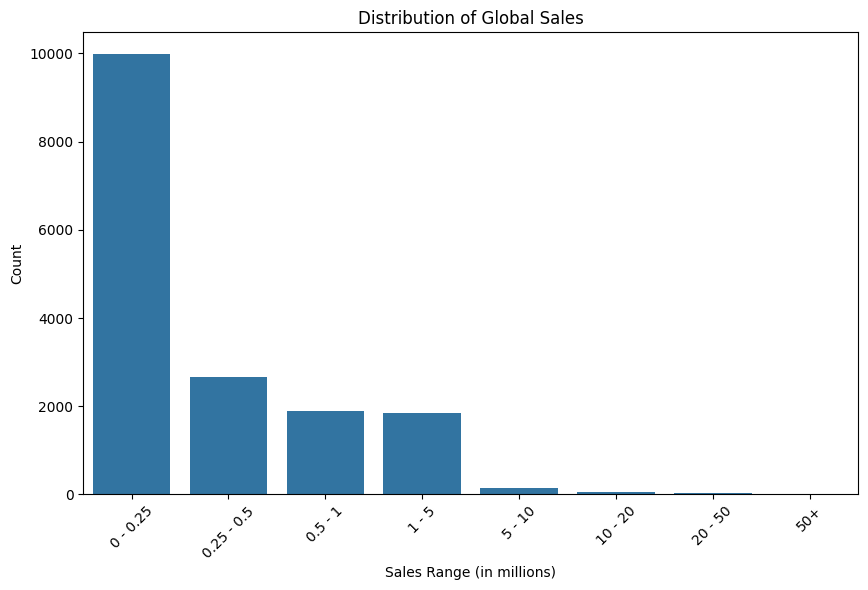

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Global_Sales_Range', order=bin_labels)
plt.title('Distribution of Global Sales')
plt.xlabel('Sales Range (in millions)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

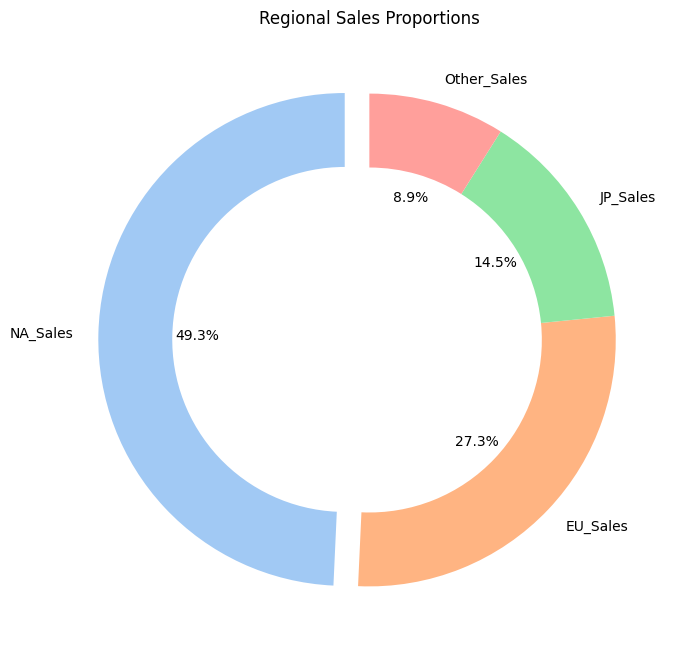

In [102]:
# Aqui se puede confirmar la importancia de el mercado de nordamerica em un contexto global

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_sums = df[sales_columns].sum()

labels = sales_columns
sizes = sales_sums
colors = sns.color_palette('pastel')[0:4]

plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors, wedgeprops={'width': 0.3})
plt.title('Regional Sales Proportions')
plt.show()


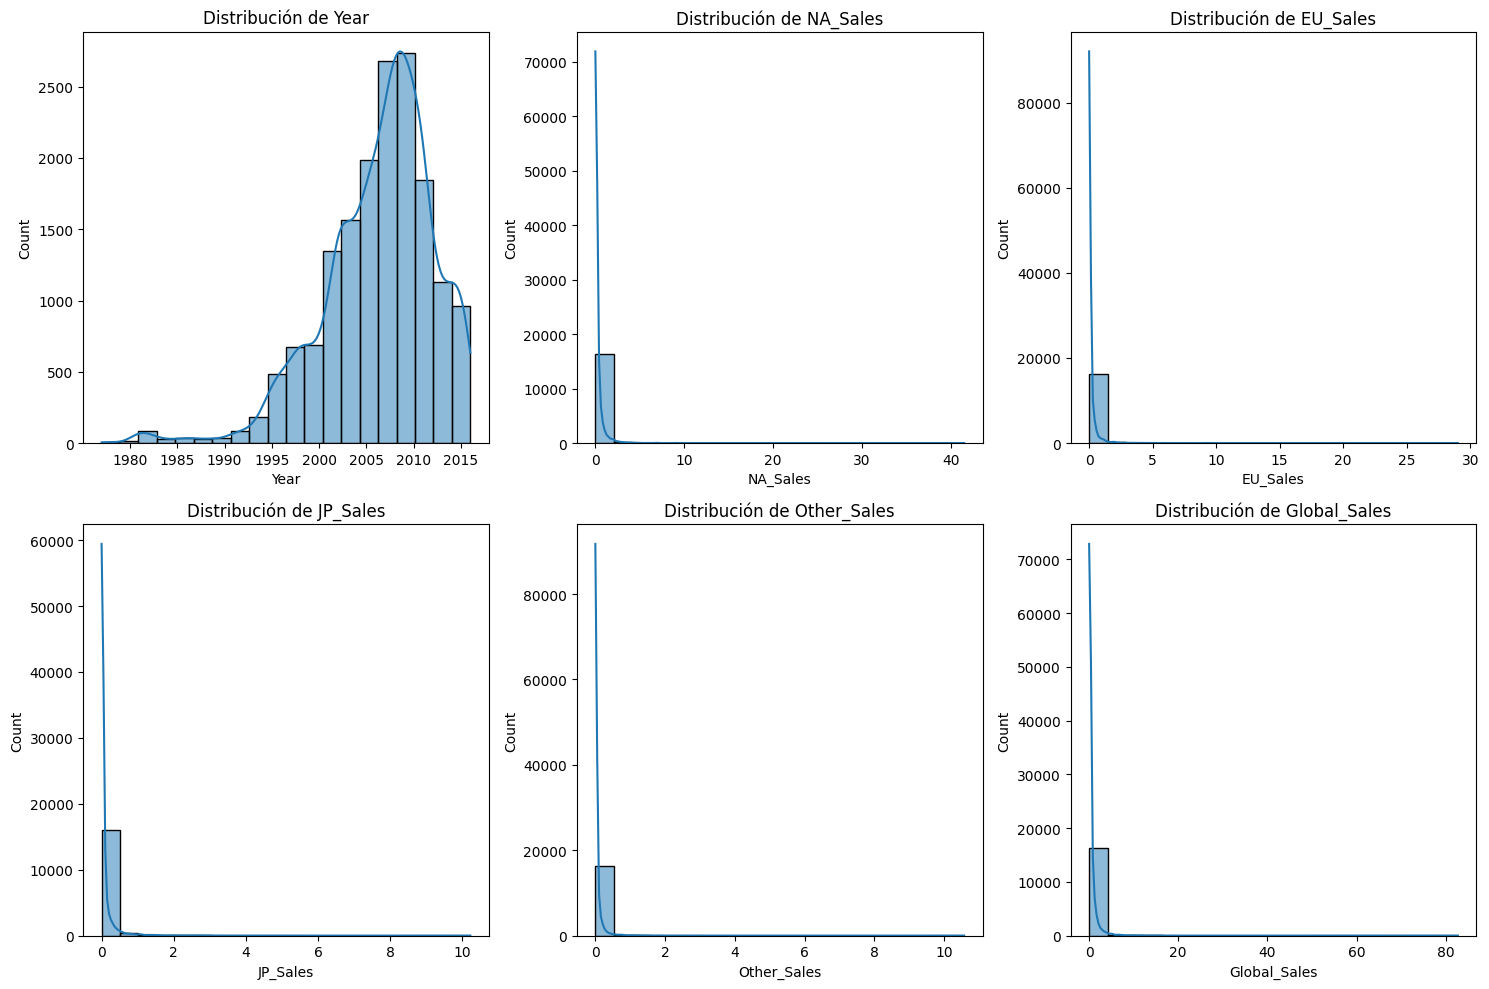

In [19]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3 , i+1)
    sns.histplot(data = df, kde=True , x = feature, bins=20)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

In [7]:
# df_melted = df.melt(id_vars=['Name','Platform','Year','Genre','Publisher'],
#                     var_name='Continent',
#                     value_name='Sales')

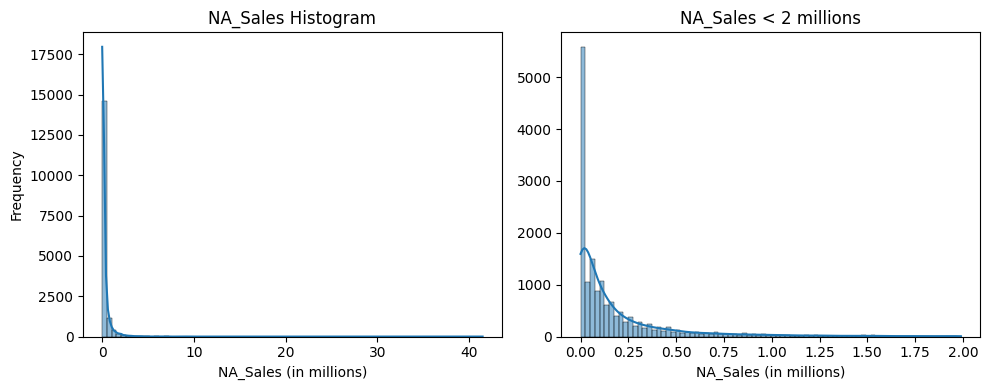

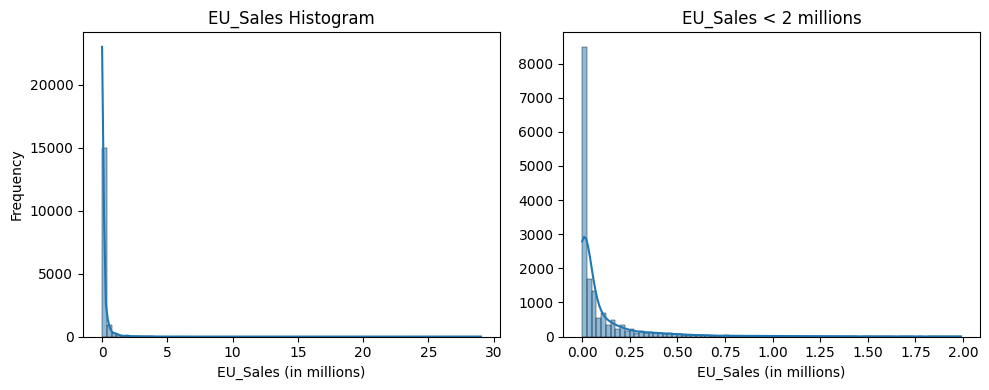

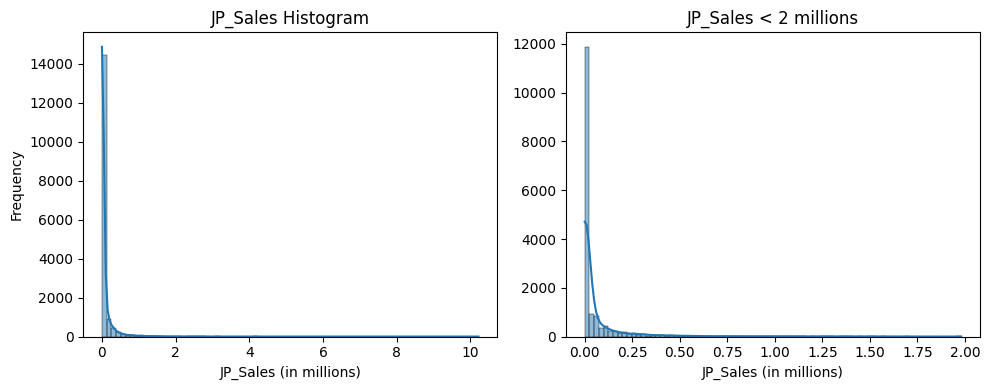

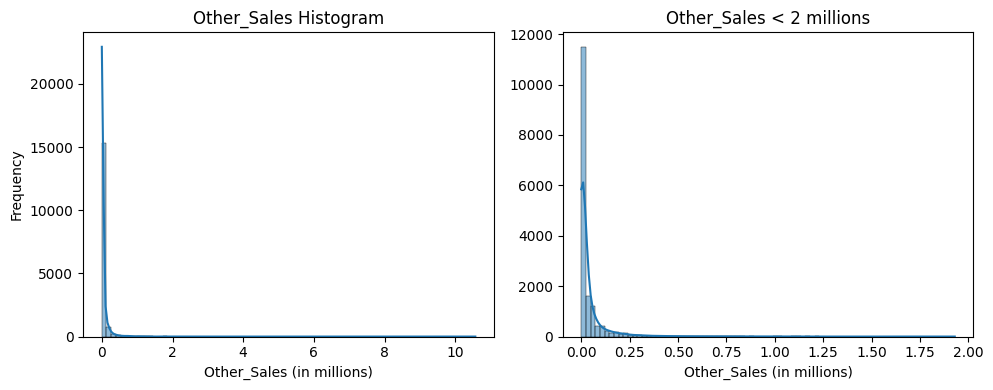

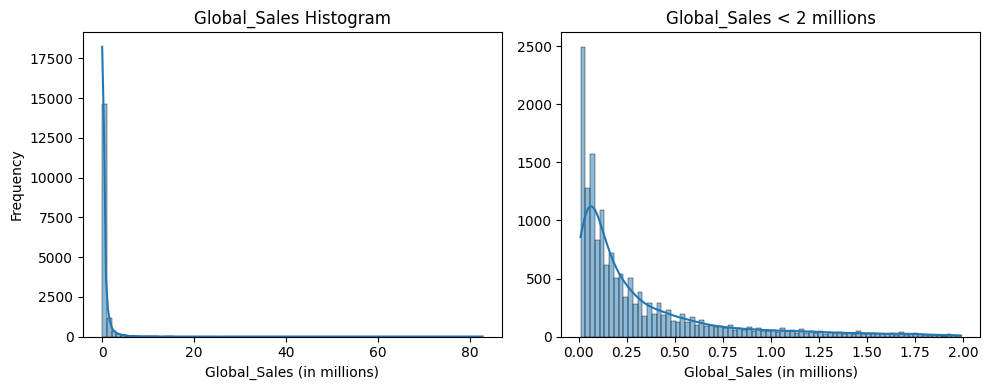

In [17]:
filtrado_ventas_por_continente_menor_que_2k = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for col in filtrado_ventas_por_continente_menor_que_2k:

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Plot histograma para todo el dataset
    sns.histplot(data=df, kde=True, x=col, bins=80, ax=axs[0])
    axs[0].set_title(f'{col} Histogram')
    axs[0].set_xlabel(f'{col} (in millions)')
    axs[0].set_ylabel('Frequency')

    # Filtro de los datos para menores que 2 millones
    df_filtered = df[df[col] < 2] 

    # Plot histograma para los datos filtrados
    sns.histplot(data=df_filtered, kde=True, x=col, bins=80, ax=axs[1])
    axs[1].set_title(f'{col} < 2 millions')
    axs[1].set_xlabel(f'{col} (in millions)')
    axs[1].set_ylabel('') 

    plt.tight_layout()
    plt.show()

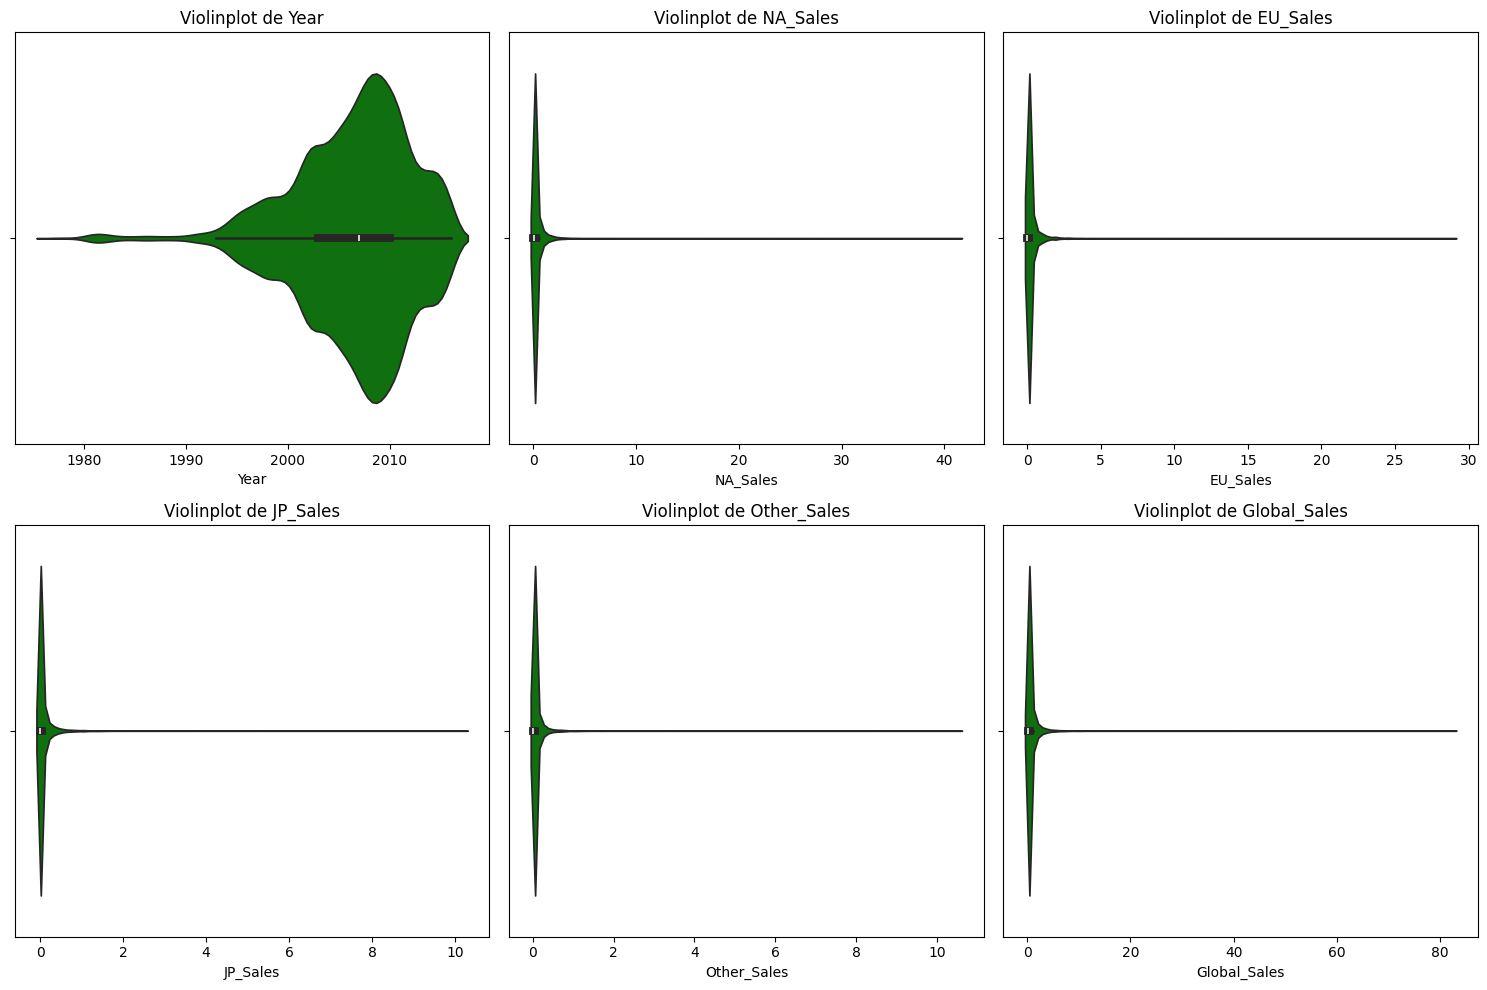

In [9]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3 , i+1)
    sns.violinplot(x=df[feature], color='green' )
    plt.title(f'Violinplot de {feature}')

plt.tight_layout()
plt.show()